In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [506]:
dataset=pd.read_csv('C:\data sciencecode\project1ML\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [507]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [508]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**data** **clining**

In [509]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [510]:
dataset[dataset.isnull().any(axis=1)]   #this used to extract row which have atleat one missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [511]:
#here we analyze that 0 to 122 row consist the data of bajaia region in algerai
#and 122 to end it consists sidi-bel abbes region data:


In [512]:
dataset.loc[:122,"region"]=0
dataset.loc[122:,"region"]=1

In [513]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [514]:
#here my resion feature values are flot so make it int using astype()
dataset['region']=dataset['region'].astype('Int64')

In [515]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [516]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [517]:
#now remove the null values from data set:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [518]:
dataset=dataset.dropna().reset_index(drop=True)

In [519]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [520]:
#here again 122 row does not have prpper values instead it consist column name so delete this row:
dataset=dataset.drop(122).reset_index(drop=True)

In [521]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [522]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [523]:
#here column name have extra spaces so we want to strip all that spaces in column names:
dataset.columns=dataset.columns.str.strip()

In [524]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [525]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    Int64 
dtypes: Int64(1), object(14)
memory usage: 28.8+ KB


                    changing datatypes as per values
here many columns have int data types but shoes only object so here i change the data types as per data values:

In [526]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [527]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [528]:
dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [529]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    Int64 
dtypes: Int64(1), int32(6), object(8)
memory usage: 23.1+ KB


In [530]:
#now some columns have flot values so chane datatype of that columns form object to float
object=[feature for feature in dataset.columns if dataset[feature].dtype=='object']

In [531]:
object

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [532]:
for i in object:
    if i!='Classes':
        dataset[i]=dataset[i].astype(float)

In [533]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    Int64  
dtypes: Int64(1), float64(7), int32(6), object(1)
memory usage: 23.1+ KB


In [534]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.0
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.0
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.0
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.0
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.0
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.0


now our data set clean and well manared with not null values and duplicated rows:


In [535]:
#so store this data set into new csv file:
dataset.to_csv('cleanalgerianforestfire.csv',index=False)

In [536]:
#now here we use further this new clean dataset csv file:
df=pd.read_csv('C:\data sciencecode\project1ML\cleanalgerianforestfire.csv')

In [537]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [538]:
#now here i dont want and nothing use of day,month and year colunm for model training :
#so removed it:
df=df.drop(['day', 'month', 'year'],axis=1)

In [539]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


 now lets talk about classes feature it is very usefull feature in dataset:
 but it categorical data so we have to encoding this categorical feature into numeric values like 0,1 as per the values of categories.

In [540]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [541]:
#encoding not fire ,fire into 0,1 numeric values:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [542]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [543]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [544]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [545]:
#now performe some visulization operation on dataset:


C:\Users\valav\AppData\Local\Temp\ipykernel_2832\835868193.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


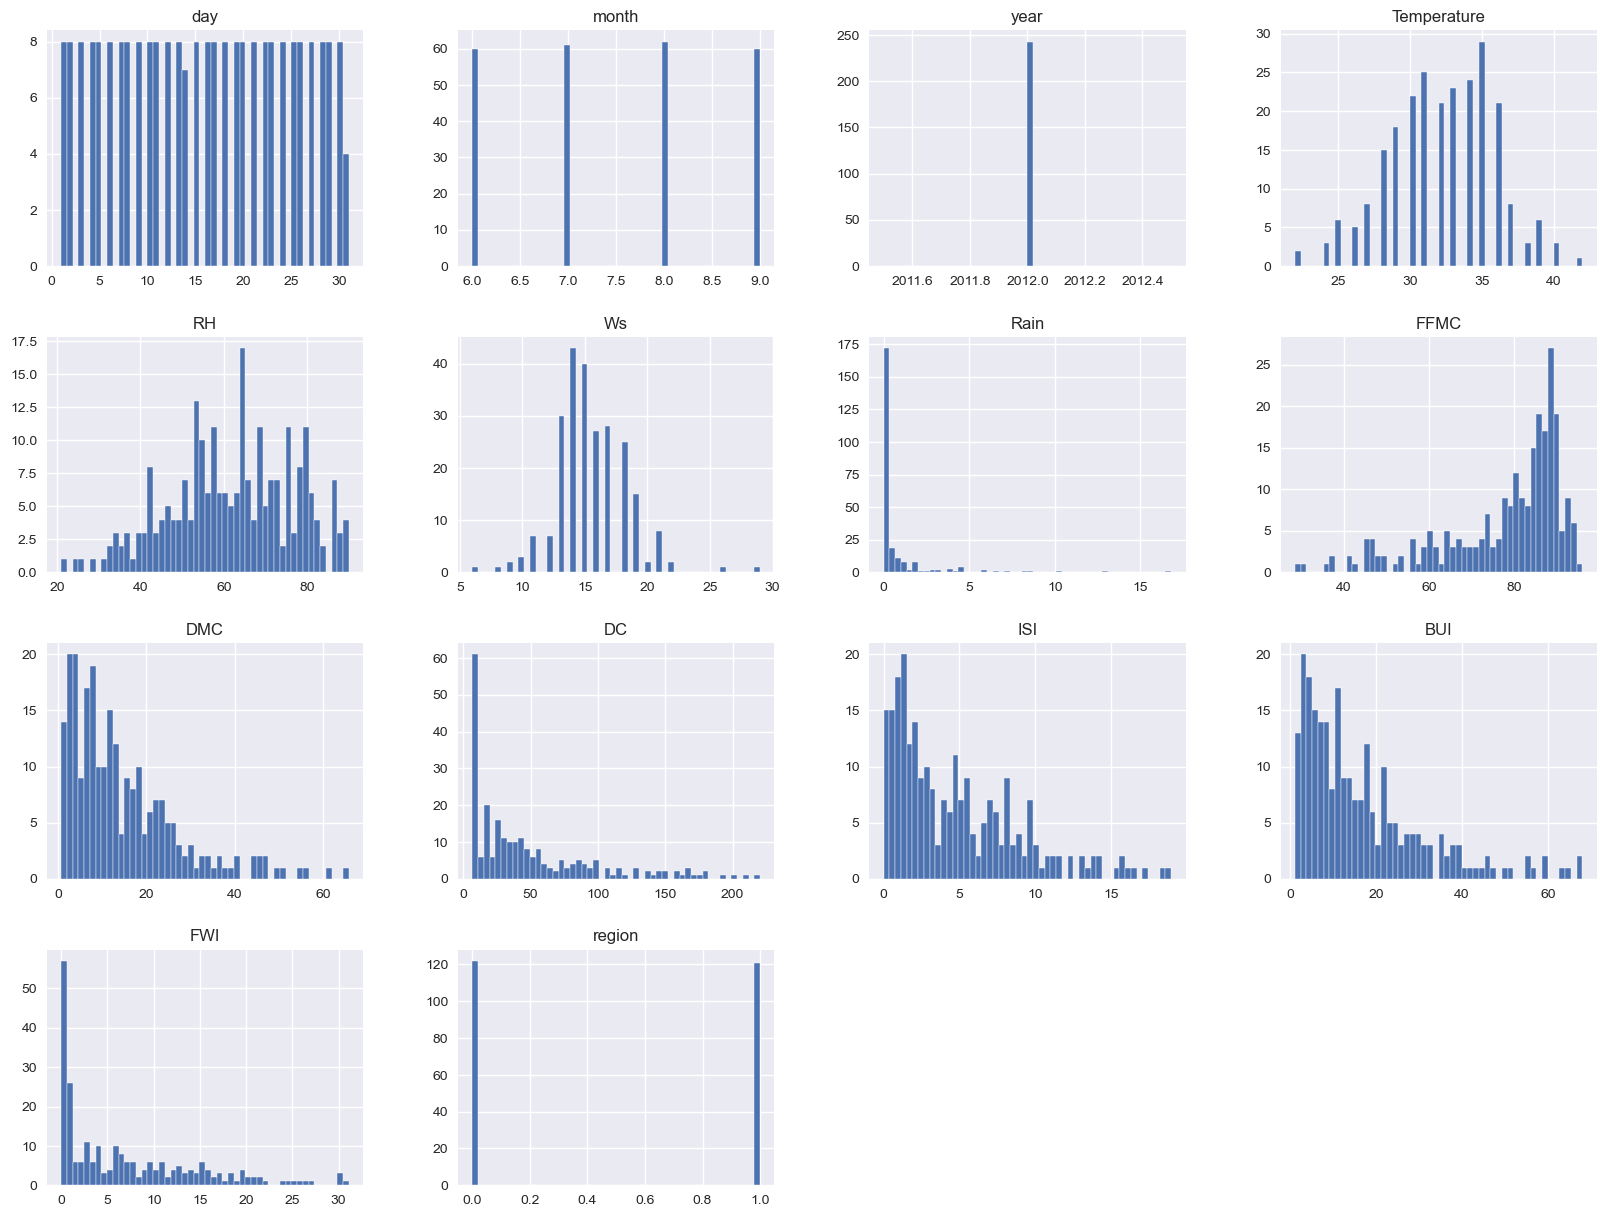

In [546]:
plt.style.use('seaborn')
dataset.hist(bins=50,figsize=(20,15))
plt.show()

In [547]:
#now i want to repesent the fire and not fire distribution on pie charrt with percentage:


In [548]:
percentage=df['Classes'].value_counts(normalize=True)*100

In [549]:
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

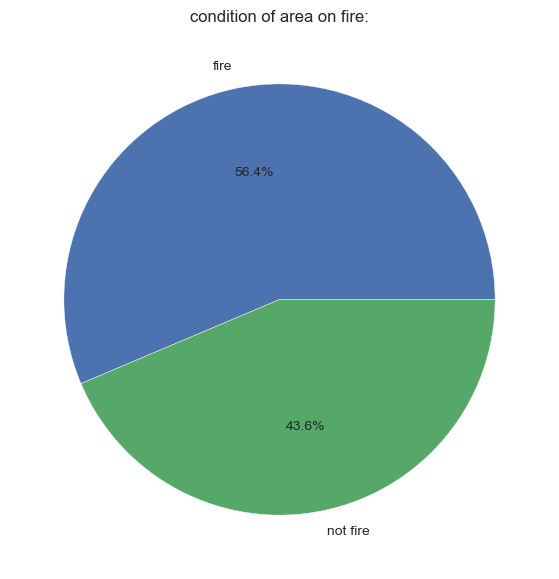

In [550]:
classeslabel=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabel,autopct='%1.1f%%')
plt.title("condition of area on fire:")
plt.show()

In [551]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

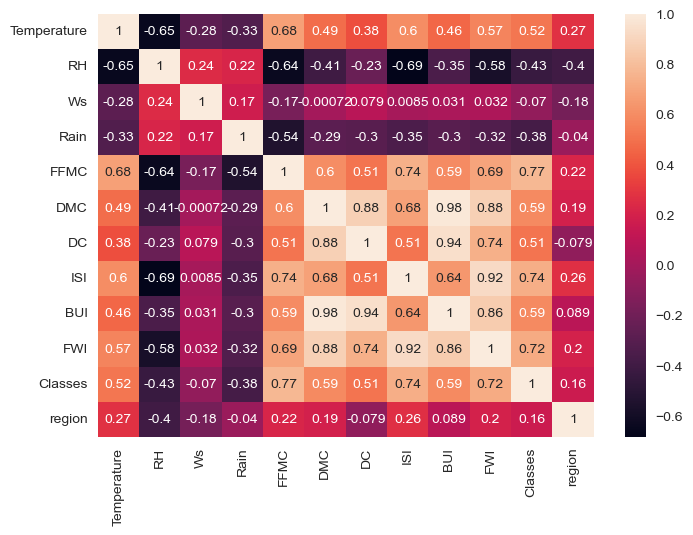

In [552]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

<Axes: >

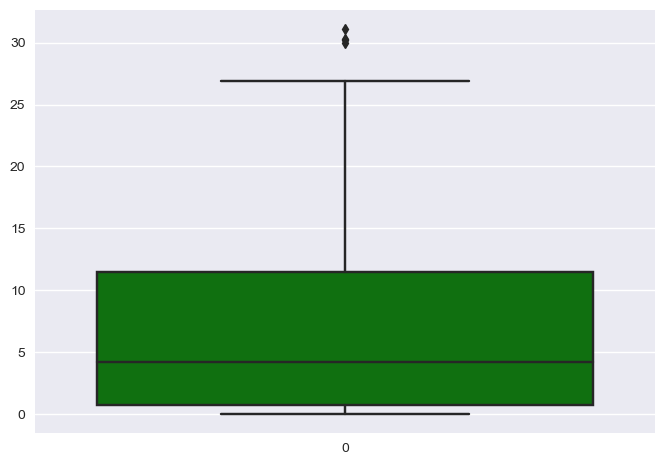

In [553]:
sns.boxplot(df['FWI'],color='green')

In [554]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [555]:
df['Classes'].head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

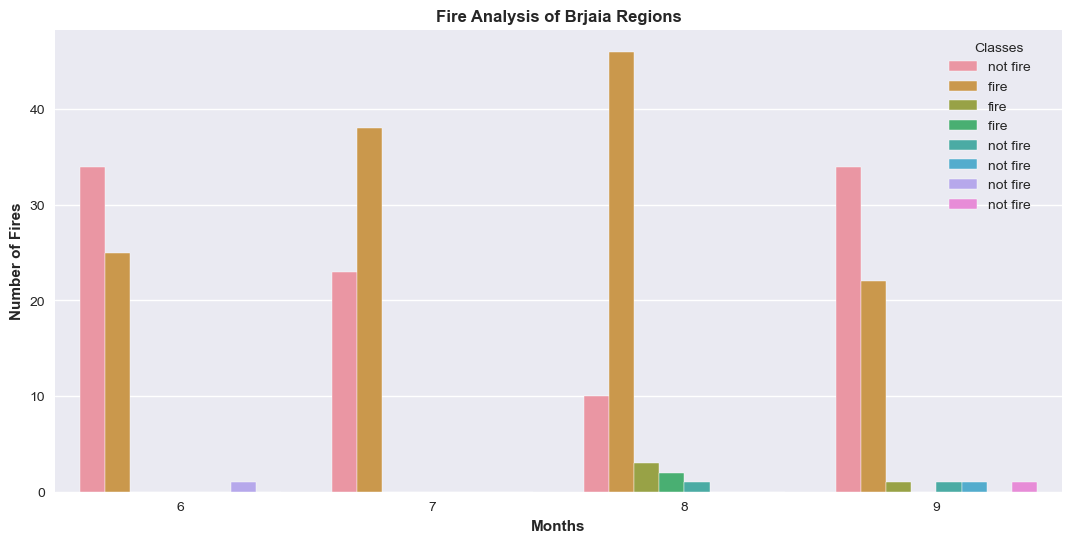

In [556]:
## Monthy Fire Analysis
dftemp=dataset.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dataset)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

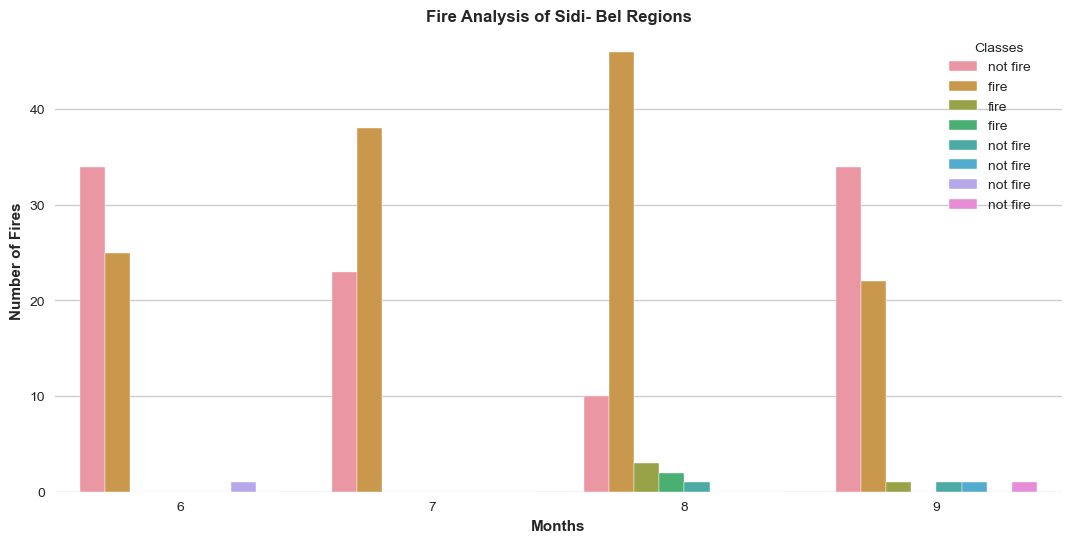

In [557]:
## Monthly Fire Analysis
dftemp=dataset.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dataset)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

============================================================================================

now we started to create a model:


In [558]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [559]:
#now seperate the independent and dependent feature:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [560]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [561]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [562]:
#now use this feature and get the train and test datasets:
from sklearn.model_selection import train_test_split

In [563]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.40,random_state=45)

In [564]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
184,39,33,17,0.0,93.7,17.1,32.1,17.2,16.9,1,1
91,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0,0
82,36,55,18,0.0,89.1,33.5,151.3,9.9,43.1,1,0
197,40,41,10,0.1,92.0,22.6,65.1,9.5,24.2,1,1
34,33,66,14,0.0,85.9,7.6,27.9,4.8,9.1,1,0


In [565]:
X_train.shape,X_test.shape

((145, 11), (98, 11))

In [566]:
y_train.shape,y_test.shape

((145,), (98,))

feature selecting: multicolerinity

In [567]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.708700,-0.287131,-0.363511,0.696225,0.518600,0.374582,0.676230,0.477958,0.567979,0.311382
RH,-0.708700,1.000000,0.190083,0.226444,-0.661338,-0.383027,-0.187771,-0.724292,-0.318655,-0.466813,-0.431023
Ws,-0.287131,0.190083,1.000000,0.275610,-0.132981,0.015428,0.136146,-0.014698,0.065343,-0.091608,-0.280632
Rain,-0.363511,0.226444,0.275610,1.000000,-0.527923,-0.273759,-0.283688,-0.335498,-0.282462,-0.358041,-0.078448
FFMC,0.696225,-0.661338,-0.132981,-0.527923,1.000000,0.598022,0.490862,0.754775,0.576593,0.789436,0.197785
DMC,0.518600,-0.383027,0.015428,-0.273759,0.598022,1.000000,0.885421,0.654786,0.984012,0.581894,0.129890
DC,0.374582,-0.187771,0.136146,-0.283688,0.490862,0.885421,1.000000,0.478772,0.951779,0.484879,-0.143073
ISI,0.676230,-0.724292,-0.014698,-0.335498,0.754775,0.654786,0.478772,1.000000,0.606734,0.731958,0.239827
BUI,0.477958,-0.318655,0.065343,-0.282462,0.576593,0.984012,0.951779,0.606734,1.000000,0.565162,0.025969
Classes,0.567979,-0.466813,-0.091608,-0.358041,0.789436,0.581894,0.484879,0.731958,0.565162,1.000000,0.147796


<Axes: >

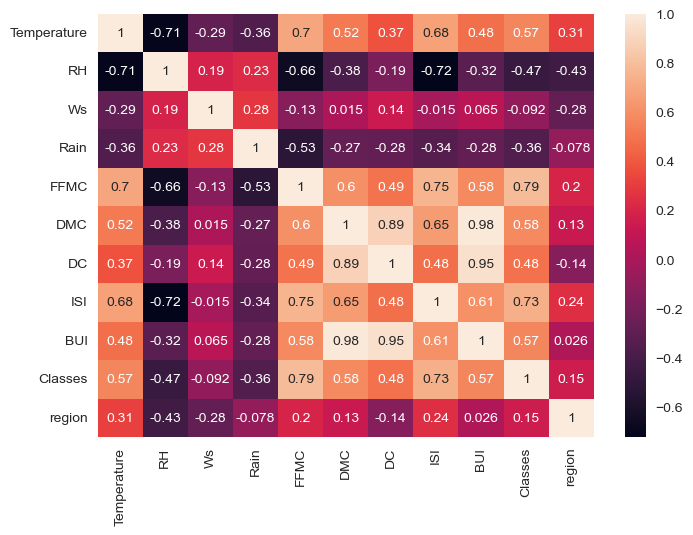

In [568]:
sns.heatmap(X_train.corr(),annot=True)

In [569]:
#here we check that many feature has multicorelanity so we just find that feature and remove that columns:


In [570]:
def correlation(dataset,thresold):
    multicorrality=set()
    corr_metrix=dataset.corr()

    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if abs(corr_metrix.iloc[i,j]>thresold):
                multicorrality.add(corr_metrix.columns[i])
    return multicorrality

colom=correlation(X_train,0.85)


In [571]:
colom

{'BUI', 'DC'}

In [572]:
#so now BUI and DC is multicolarative:
#so we have to remove this columns:
X_train.drop(colom,axis=1,inplace=True)
X_test.drop(colom,axis=1,inplace=True)

In [573]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
184,39,33,17,0.0,93.7,17.1,17.2,1,1
91,28,80,21,16.8,52.5,8.7,0.6,0,0
82,36,55,18,0.0,89.1,33.5,9.9,1,0
197,40,41,10,0.1,92.0,22.6,9.5,1,1
34,33,66,14,0.0,85.9,7.6,4.8,1,0


In [574]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
186,34,42,17,0.1,88.3,23.6,19.0,1,1
117,31,54,11,0.0,82.0,6.0,2.5,0,0
47,31,68,14,0.0,85.4,12.1,4.6,1,0
69,35,59,17,0.0,87.4,14.8,6.9,1,0
150,37,36,13,0.6,86.2,17.9,4.8,1,1


now i performe standard scalling to downsizing the train and test data of independent varible:

In [575]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()

In [576]:
X_train_scalled=scaller.fit_transform(X_train)

In [577]:
X_train_scalled

array([[ 1.73920221, -1.96003796,  0.56613574, ...,  3.02637949,
         0.8521681 ,  1.0069205 ],
       [-1.04876515,  1.14711689,  2.03859642, ..., -0.99598132,
        -1.17347739, -0.99312707],
       [ 0.97884747, -0.50562505,  0.93425091, ...,  1.25750997,
         0.8521681 , -0.99312707],
       ...,
       [-0.54186199, -1.43116054, -0.1700946 , ...,  0.89404364,
         0.8521681 ,  1.0069205 ],
       [ 1.48575063, -1.29894118, -0.90632494, ..., -0.1478932 ,
         0.8521681 ,  1.0069205 ],
       [ 1.23229905, -0.63784441, -0.53820977, ...,  0.79711928,
         0.8521681 ,  1.0069205 ]])

In [578]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
186,34,42,17,0.1,88.3,23.6,19.0,1,1
117,31,54,11,0.0,82.0,6.0,2.5,0,0
47,31,68,14,0.0,85.4,12.1,4.6,1,0
69,35,59,17,0.0,87.4,14.8,6.9,1,0
150,37,36,13,0.6,86.2,17.9,4.8,1,1


In [579]:
X_test_scalled=scaller.transform(X_test)

In [580]:
X_test_scalled

array([[ 4.71944318e-01, -1.36505086e+00,  5.66135744e-01,
        -3.20813729e-01,  7.28899850e-01,  7.15939230e-01,
         3.46253909e+00,  8.52168103e-01,  1.00692050e+00],
       [-2.88410416e-01, -5.71734728e-01, -1.64255528e+00,
        -3.64781584e-01,  3.12014042e-01, -6.91887026e-01,
        -5.35590627e-01, -1.17347739e+00, -9.93127066e-01],
       [-2.88410416e-01,  3.53800757e-01, -5.38209766e-01,
        -3.64781584e-01,  5.37000034e-01, -2.03947244e-01,
        -2.67377536e-02,  8.52168103e-01, -9.93127066e-01],
       [ 7.25395896e-01, -2.41186341e-01,  5.66135744e-01,
        -3.64781584e-01,  6.69344735e-01,  1.20261020e-02,
         5.30577298e-01,  8.52168103e-01, -9.93127066e-01],
       [ 1.23229905e+00, -1.76170892e+00, -9.06324935e-01,
        -1.00974453e-01,  5.89937914e-01,  2.59995499e-01,
         2.17244248e-02,  8.52168103e-01,  1.00692050e+00],
       [ 7.25395896e-01, -7.70063761e-01, -9.06324935e-01,
        -2.32878019e-01,  2.65693396e-01,  7.601820

now check the box plot that what impact done by scalling on x_train data:

<Axes: title={'center': 'after scalling'}>

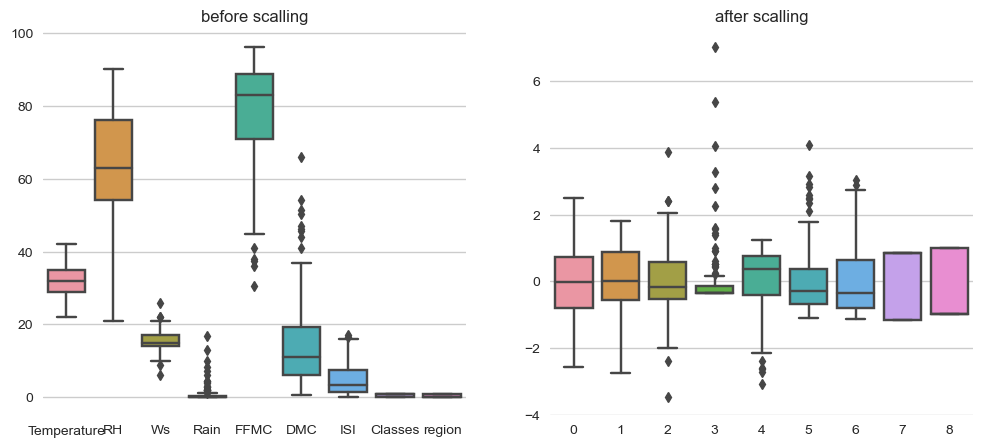

In [581]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("before scalling")
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title("after scalling")
sns.boxplot(data=X_train_scalled)

now create linear regerssion model:
here we have multiple independent feature so this is multiple linear regression:

In [582]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error  #this check the error of models 
from sklearn.metrics import r2_score     #this check for accuracy of model and give score

regresion=LinearRegression()
model1=regresion.fit(X_train_scalled,y_train)


In [583]:
model1.coef_

array([-4.14381123e-02, -4.83800040e-02,  4.37651477e-03, -9.98594652e-02,
       -1.05750627e+00,  3.46487288e+00,  5.25588508e+00,  2.84878802e-01,
       -3.22937655e-01])

In [584]:
model1.intercept_

7.088275862068968

In [585]:
# prediction for y teat data using x test data:
y_test_predicted=model1.predict(X_test_scalled)

In [586]:
y_test,y_test_predicted

(186    12.6
 117     1.7
 47      6.0
 69      9.9
 150     7.2
        ... 
 206    31.1
 115     0.7
 231     5.6
 37      8.0
 172    25.4
 Name: FWI, Length: 98, dtype: float64,
 array([26.99539644,  1.60128491,  6.26560159,  9.79475874,  7.43732138,
         4.26859853, 19.47684147,  1.51283624, -0.28016446,  2.28711102,
        15.54250058, -0.35699891, -0.06012715, 16.43754258, 12.12053823,
         6.0456226 ,  1.49687273,  0.2210797 ,  8.1954946 ,  1.25520892,
         6.25854403,  0.69609461,  8.26667884, -0.24210492,  1.15410306,
         0.74575795,  9.44113435, 17.97304432, 18.3847062 , -0.07589751,
         0.16021195,  8.25020112, -0.8450904 , -0.08027436, 13.19140939,
         4.49418441,  0.83870407, 10.44112993,  0.51573393,  8.78096382,
         9.5859038 ,  2.33588609, 14.52794051,  7.10009814, 30.42780795,
         9.69722956,  1.00977399,  0.51689611,  6.7558975 ,  3.1894249 ,
         5.13819316, -0.26872401,  0.29431103, 20.4314843 , -0.74587114,
        15.202

In [587]:
#now check the accuracy score of model1:
score=r2_score(y_test,y_test_predicted)
score

0.9493966127646876

In [588]:
#so here our model is 95% accurate this is very good and efficient model:

In [589]:
#now we check the mean absolute error for model:
mae=mean_absolute_error(y_test,y_test_predicted)
mae


0.6919352144691853